In [24]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.patches as patches
import math


In [4]:
#read color coding file
color_data = pd.read_csv("D:\Study\Practice projects\Color Detection\colors.csv")

In [5]:
color_data.head()

,Color ID,Color Name,Hex Code,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


In [6]:
image = cv2.imread('D:/Study/Practice projects/Color Detection/nature.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    

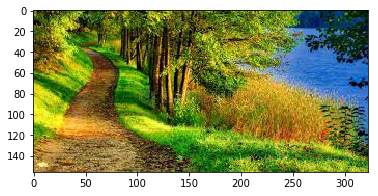

In [20]:
plt.imshow(np.array(image))
plt.show()

In [8]:
print(image.shape)

(156, 323, 3)


In [41]:
def hex_to_rgb(hexcode):
    value = hexcode.lstrip('#')
    rgb = tuple(int(value[i:i+2], 16) for i in (0, 2, 4))
    return rgb

In [46]:
def findcolor(color_name,img_clr_numpy):
    target_clr_hex = color_data.loc[color_data['Color Name']==color_name,'Hex Code']
    target_clr_hex = target_clr_hex.iloc[0]#'#b2b34b'#
    
    target_red = color_data.loc[color_data['Color Name']==color_name,'R']
    target_green = color_data.loc[color_data['Color Name']==color_name,'G']
    target_blue = color_data.loc[color_data['Color Name']==color_name,'B']
    
    target_red= target_red.iloc[0]
    target_green= target_green.iloc[0]
    target_blue= target_blue.iloc[0]
    
    print('Target hex value:', target_clr_hex)
    row_count = img_clr_numpy.shape[0]
    column_count = img_clr_numpy.shape[1]
    exact_color_found = False
    output_row= -1#[]
    output_clm = -1#[]
    least_dist = math.inf
    least_dist_hex = '#000000'
    
    for row in range(row_count):
        for clm in range(column_count):
            red = img_clr_numpy[row,clm,0]
            green = img_clr_numpy[row,clm,1]
            blue = img_clr_numpy[row,clm,2]
            pixel_hex_value = '#{:02x}{:02x}{:02x}'.format(red, green, blue)
            #print('Hex value: ',pixel_hex_value)
            
            distance = pow(target_red-red,2) + pow(target_green-green,2)+pow(target_blue-blue,2) 
            distance = math.sqrt(distance)
            
            if(pixel_hex_value == target_clr_hex):
                output_row = row#.append(row)
                output_clm=clm#append(clm)
                exact_color_found = True
                least_dist_hex = target_clr_hex
                break
            else:
                if(distance<least_dist):
                    least_dist = distance
                    output_row = row
                    output_clm = clm
                    least_dist_hex = pixel_hex_value
    if exact_color_found == True:
        print('Exact match found')
    else:
        print('Exact match not found')
        print('Closet color hex code: ',least_dist_hex)
            
                
    return output_row,output_clm,target_clr_hex,least_dist_hex
                
                

    

Target hex value: #f0f8ff
Exact match not found
Closet color hex code:  #c9e9c4
Target


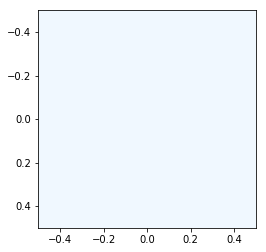

Result


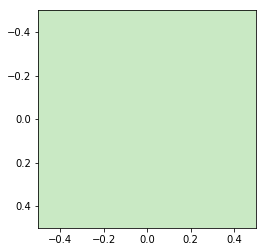

In [49]:
row,column,target_hex,output_hex = findcolor('Alice Blue',np.array(image))
#print(row)
#print(column)
target_rgb = hex_to_rgb(target_hex)
output_rgb = hex_to_rgb(output_hex)
print('Target')
plt.imshow([[target_rgb]])
plt.show()
print('Result')
plt.imshow([[output_rgb]])
plt.show()


18
225


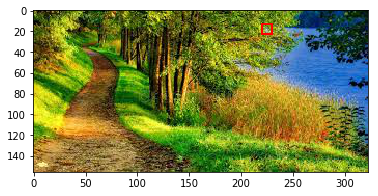

In [40]:
fig,ax = plt.subplots(1)
ax.imshow(np.array(image))

start_y = row-5
start_x = column - 5
print(start_r)
print(start_c)
rect = patches.Rectangle((start_x,start_y),10,10,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()
